# Data Sets and Noble Suggestions:
- Teams are provided with specific data sets and noble suggestions to address these challenges:
### 1. Training, Validation, and Test Data (Jan 1, 2018, to Jan 31,2022) 
- Teams should use this period for training, validation, and testing their models.

### 2. Out-of-Sample 1 (Feb 1, 2022, to Dec 31, 2022)
- A separate dataset is provided for teams to assess their model's performance in an out-of-sample scenario.

### 3. Out-of-Sample 2 (Jan 1, 2023, to Dec 31, 2023)
- Another dataset is supplied for teams to evaluate their model's generalization capabilities further.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('Satatinoary_data.csv')

# Splitting the data Data

In [5]:
# Determine the sizes for train, validation, and test sets
train_size = int(0.6 * len(data))  # 60% for training
val_size = int(0.2 * len(data))    # 20% for validation
test_size = len(data) - train_size - val_size  # Remaining for testing

# Split the data into train, validation, and test sets
train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

Epoch 1/50
37/37 [==============================] - 15s 29ms/step - loss: 0.0433
Epoch 2/50
37/37 [==============================] - 1s 26ms/step - loss: 0.0026
Epoch 3/50
37/37 [==============================] - 1s 27ms/step - loss: 0.0023
Epoch 4/50
37/37 [==============================] - 1s 25ms/step - loss: 0.0023
Epoch 5/50
37/37 [==============================] - 1s 26ms/step - loss: 0.0023
Epoch 6/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0023
Epoch 7/50
37/37 [==============================] - 1s 26ms/step - loss: 0.0023
Epoch 8/50
37/37 [==============================] - 1s 27ms/step - loss: 0.0023
Epoch 9/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0023
Epoch 10/50
37/37 [==============================] - 1s 27ms/step - loss: 0.0024
Epoch 11/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0023
Epoch 12/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0023
Epoch 13/50
37/37 [=================

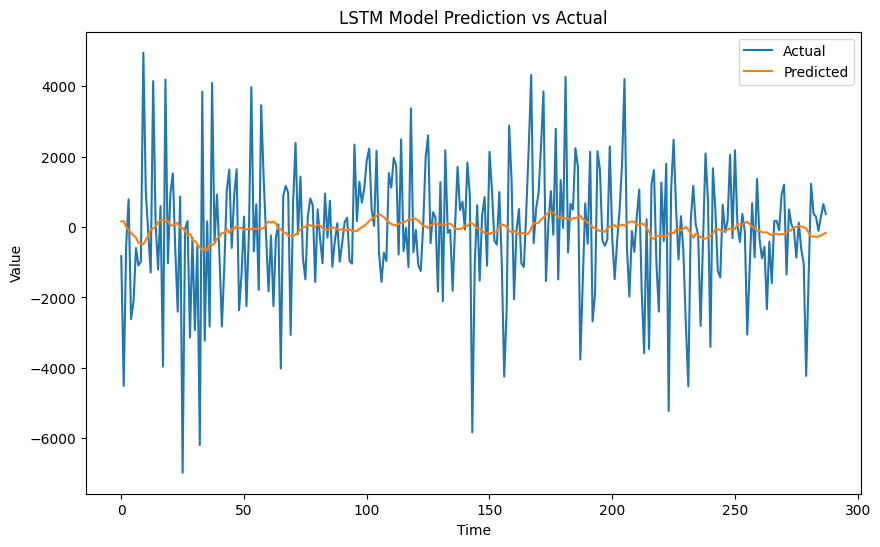

In [10]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Open'].values.reshape(-1, 1))

# Splitting data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create dataset with time steps
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        a = data[i:(i + time_steps), 0]
        X.append(a)
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps and creating train and test datasets
time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predicting on test data
predicted_values = model.predict(X_test)

# Inverse transform predictions to original scale
predicted_values = scaler.inverse_transform(predicted_values)

# Inverse transform actual test values to original scale for evaluation
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

# Calculating RMSE for evaluation
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('LSTM Model Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [12]:
X_train[0]

array([[0.45470186],
       [0.58360616],
       [0.50931319],
       [0.50328962],
       [0.62785128],
       [0.49339285],
       [0.4152054 ],
       [0.39409508],
       [0.45133987],
       [0.51542081]])